<a href="https://colab.research.google.com/github/aiyazsarwar/Deep-Learning/blob/master/Keras_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Keras -- MLPs on MNIST

In [0]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

Using TensorFlow backend.


In [0]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [0]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [0]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [0]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [0]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [0]:
# An example data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [0]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [0]:
# example data point after normlizing
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [0]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


<h2>  Softmax classifier  </h2>

In [0]:
# https://keras.io/getting-started/sequential-model-guide/

# The Sequential model is a linear stack of layers.
# you can create a Sequential model by passing a list of layer instances to the constructor:

# model = Sequential([
#     Dense(32, input_shape=(784,)),
#     Activation('relu'),
#     Dense(10),
#     Activation('softmax'),
# ])

# You can also simply add layers via the .add() method:

# model = Sequential()
# model.add(Dense(32, input_dim=784))
# model.add(Activation('relu'))

###

# https://keras.io/layers/core/

# keras.layers.Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', 
# bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, 
# kernel_constraint=None, bias_constraint=None)

# Dense implements the operation: output = activation(dot(input, kernel) + bias) where
# activation is the element-wise activation function passed as the activation argument, 
# kernel is a weights matrix created by the layer, and 
# bias is a bias vector created by the layer (only applicable if use_bias is True).

# output = activation(dot(input, kernel) + bias)  => y = activation(WT. X + b)

####

# https://keras.io/activations/

# Activations can either be used through an Activation layer, or through the activation argument supported by all forward layers:

# from keras.layers import Activation, Dense

# model.add(Dense(64))
# model.add(Activation('tanh'))

# This is equivalent to:
# model.add(Dense(64, activation='tanh'))

# there are many activation functions ar available ex: tanh, relu, softmax


from keras.models import Sequential 
from keras.layers import Dense, Activation 


In [0]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

In [0]:
# start building a model
model = Sequential()

# The model needs to know what input shape it should expect. 
# For this reason, the first layer in a Sequential model 
# (and only the first, because following layers can do automatic shape inference)
# needs to receive information about its input shape. 
# you can use input_shape and input_dim to pass the shape of input

# output_dim represent the number of nodes need in that layer
# here we have 10 nodes

model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))

In [0]:
# Before training a model, you need to configure the learning process, which is done via the compile method

# It receives three arguments:
# An optimizer. This could be the string identifier of an existing optimizer , https://keras.io/optimizers/
# A loss function. This is the objective that the model will try to minimize., https://keras.io/losses/
# A list of metrics. For any classification problem you will want to set this to metrics=['accuracy'].  https://keras.io/metrics/


# Note: when using the categorical_crossentropy loss, your targets should be in categorical format 
# (e.g. if you have 10 classes, the target for each sample should be a 10-dimensional vector that is all-zeros except 
# for a 1 at the index corresponding to the class of the sample).

# that is why we converted out labels into vectors

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Keras models are trained on Numpy arrays of input data and labels. 
# For training a model, you will typically use the  fit function

# fit(self, x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, 
# validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, 
# validation_steps=None)

# fit() function Trains the model for a fixed number of epochs (iterations on a dataset).

# it returns A History object. Its History.history attribute is a record of training loss values and 
# metrics values at successive epochs, as well as validation loss values and validation metrics values (if applicable).

# https://github.com/openai/baselines/issues/20

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test)) 


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 28us/step - loss: 1.2659 - accuracy: 0.7074 - val_loss: 0.8072 - val_accuracy: 0.8363
Epoch 2/20
60000/60000 [==============================] - 1s 13us/step - loss: 0.7147 - accuracy: 0.8422 - val_loss: 0.6061 - val_accuracy: 0.8648
Epoch 3/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.5865 - accuracy: 0.8601 - val_loss: 0.5250 - val_accuracy: 0.8767
Epoch 4/20
60000/60000 [==============================] - 2s 25us/step - loss: 0.5249 - accuracy: 0.8692 - val_loss: 0.4796 - val_accuracy: 0.8818
Epoch 5/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.4873 - accuracy: 0.8757 - val_loss: 0.4498 - val_accuracy: 0.8857
Epoch 6/20
60000/60000 [==============================] - 1s 12us/step - loss: 0.4615 - accuracy: 0.8804 - val_loss: 0.4285 - val_accuracy: 0.8888
Epoch 7/20
60000/60000 [==============================] - 1s 12us/st

Test score: 0.3358841430604458
Test accuracy: 0.9088000059127808


<IPython.core.display.Javascript object>


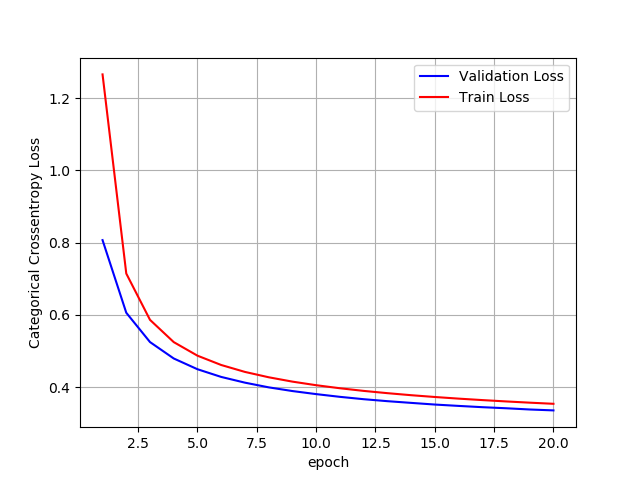

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

 <h3>  MLP + Sigmoid activation + SGDOptimizer </h3>

In [0]:
# Multilayer perceptron

model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid', input_shape=(input_dim,)))
model_sigmoid.add(Dense(128, activation='sigmoid'))
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_sigmoid.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 72us/step - loss: 2.2692 - accuracy: 0.2100 - val_loss: 2.2254 - val_accuracy: 0.4173
Epoch 2/20
60000/60000 [==============================] - 3s 48us/step - loss: 2.1846 - accuracy: 0.4363 - val_loss: 2.1334 - val_accuracy: 0.5203
Epoch 3/20
60000/60000 [==============================] - 4s 62us/step - loss: 2.0770 - accuracy: 0.5651 - val_loss: 2.0046 - val_accuracy: 0.6141
Epoch 4/20
60000/60000 [==============================] - 4s 68us/step - loss: 1.9232 - accuracy: 0.6253 - val_loss: 1.8183 - val_accuracy: 0.6354
Epoch 5/20
60000/60000 [==============================] - 4s 70us/step - loss: 1.7160 - accuracy: 0.6629 - val_loss: 1.5865 - val_accuracy: 0.6835
Epoch 6/20
60000/60000 [==============================] - 4s 58us/step - loss: 1.4798 - accuracy: 0.6991 - val_loss: 1.3490 - val_accuracy: 0.7285
Epoch 7/20
60000/60000 [==============================] - 4s 71us/st

Test score: 0.4653551373481751
Test accuracy: 0.8756999969482422


<IPython.core.display.Javascript object>


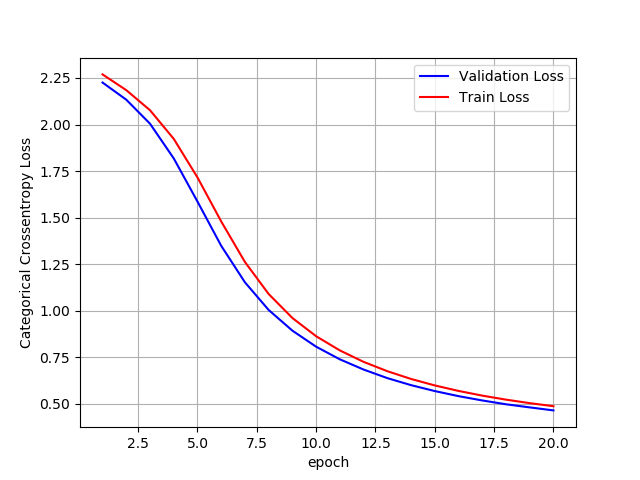

In [0]:
score = model_sigmoid.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


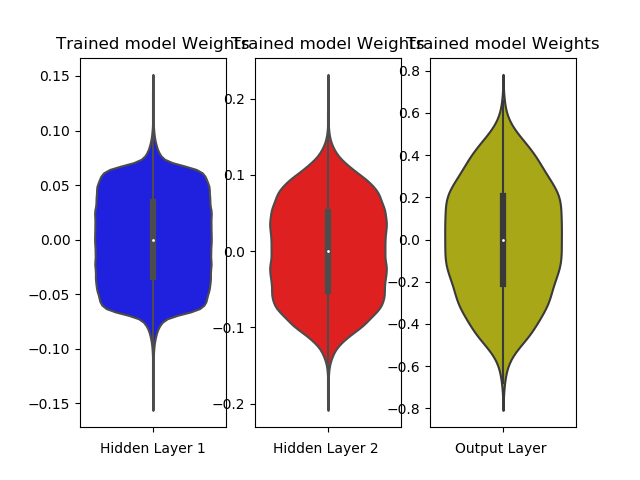

In [0]:
w_after = model_sigmoid.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2>MLP + Sigmoid activation + ADAM </h2>

In [0]:
model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid', input_shape=(input_dim,)))
model_sigmoid.add(Dense(128, activation='sigmoid'))
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

model_sigmoid.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 119us/step - loss: 0.5361 - accuracy: 0.8598 - val_loss: 0.2508 - val_accuracy: 0.9266
Epoch 2/20
60000/60000 [==============================] - 6s 105us/step - loss: 0.2203 - accuracy: 0.9359 - val_loss: 0.1874 - val_accuracy: 0.9445
Epoch 3/20
60000/60000 [========

Test score: 0.06934889737223567
Test accuracy: 0.980400025844574


<IPython.core.display.Javascript object>


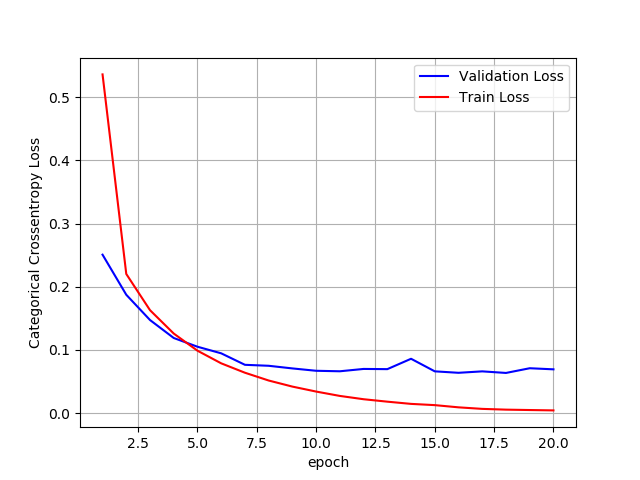

In [0]:
score = model_sigmoid.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


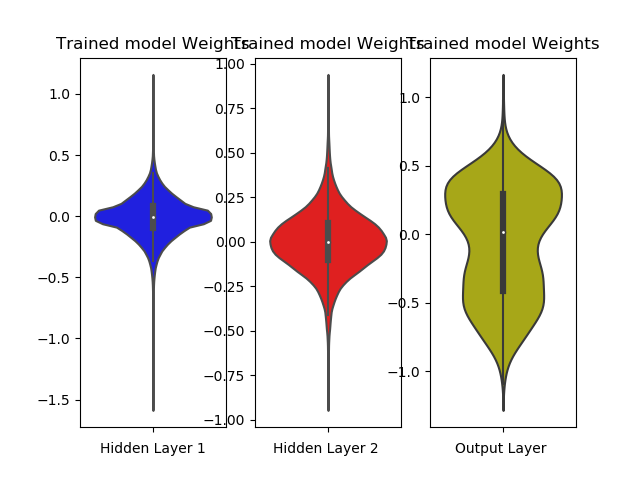

In [0]:
w_after = model_sigmoid.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> MLP + ReLU +SGD </h2>

In [0]:
# Multilayer perceptron

# https://arxiv.org/pdf/1707.09725.pdf#page=95
# for relu layers
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.062  => N(0,σ) = N(0,0.062)
# h2 =>  σ=√(2/(fan_in) = 0.125  => N(0,σ) = N(0,0.125)
# out =>  σ=√(2/(fan_in+1) = 0.120  => N(0,σ) = N(0,0.120)

model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_9 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_relu.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 71us/step - loss: 0.7740 - accuracy: 0.7865 - val_loss: 0.4064 - val_accuracy: 0.8884
Epoch 2/20
60000/60000 [==============================] - 4s 71us/step - loss: 0.3631 - accuracy: 0.8982 - val_loss: 0.3102 - val_accuracy: 0.9135
Epoch 3/20
60000/60000 [==============================] - 4s 61us/step - loss: 0.2982 - accuracy: 0.9157 - val_loss: 0.2712 - val_accuracy: 0.9221
Epoch 4/20
60000/60000 [==============================] - 5s 80us/step - loss: 0.2632 - accuracy: 0.9248 - val_loss: 0.2429 - val_accuracy: 0.9299
Epoch 5/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.2385 - accuracy: 0.9322 - val_loss: 0.2237 - val_accuracy: 0.9353
Epoch 6/20
60000/60000 [==============================] - 5s 76us/step - loss: 0.2197 - accuracy: 0.9371 - val_loss: 0.2076 - val_accuracy: 0.9411
Epoch 7/20
60000/60000 [==============================] - 4s 62us/st

Test score: 0.12284392971508205
Test accuracy: 0.964900016784668


<IPython.core.display.Javascript object>


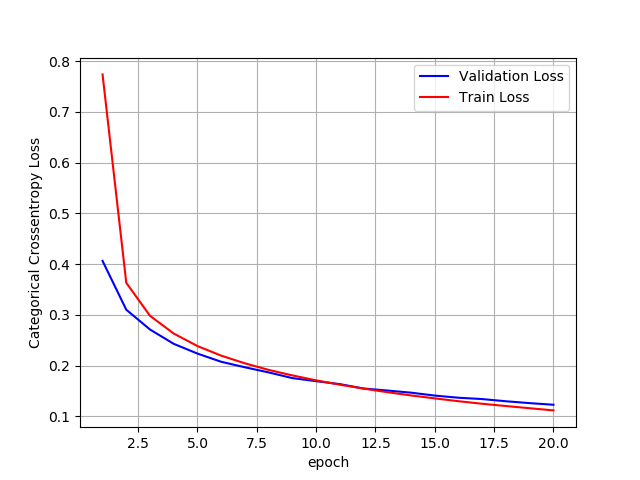

In [0]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


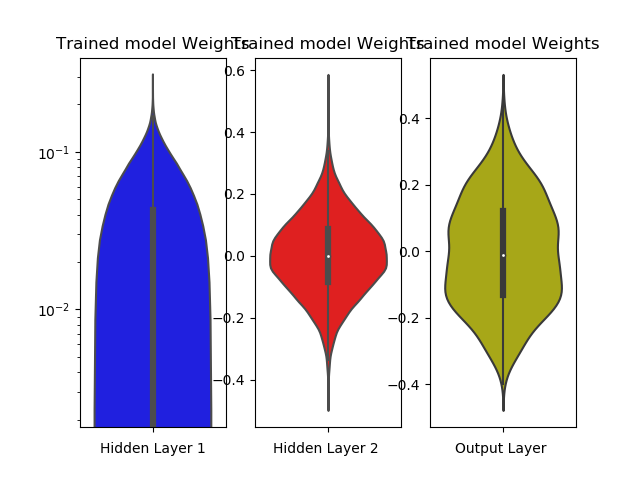

In [0]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> MLP + ReLU + ADAM </h2>

In [0]:
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_12 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 101us/step - loss: 0.2392 - accuracy: 0.9295 - val_loss: 0.1077 - val_accuracy: 0.9651
Epoch 2/20
60000/60000 [==============================] - 6s 97us/step - loss: 0.0853 - accuracy: 0.9737 - val_loss: 0.0785 - val_accuracy: 0.9740
Epoch 3/20
60000/60000 [====

Test score: 0.08363374557410676
Test accuracy: 0.983299970626831


<IPython.core.display.Javascript object>


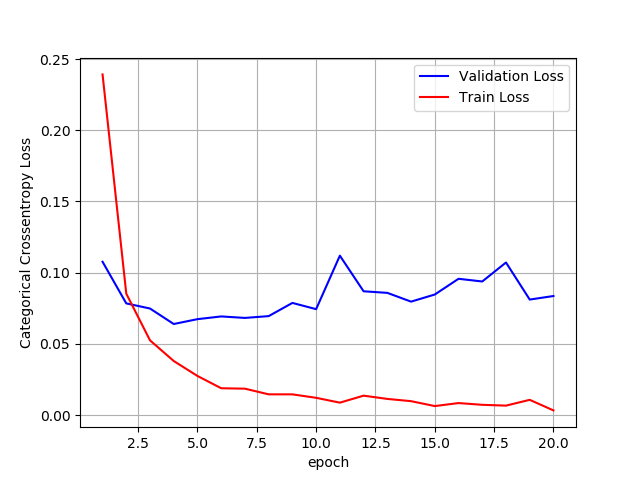

In [0]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


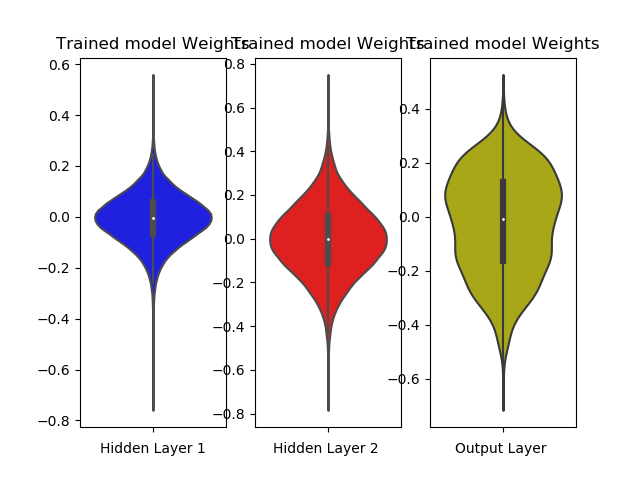

In [0]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> MLP + Batch-Norm on hidden Layers + AdamOptimizer </2>

In [0]:
# Multilayer perceptron

# https://intoli.com/blog/neural-network-initialization/ 
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni+ni+1). 
# h1 =>  σ=√(2/(ni+ni+1) = 0.039  => N(0,σ) = N(0,0.039)
# h2 =>  σ=√(2/(ni+ni+1) = 0.055  => N(0,σ) = N(0,0.055)
# h1 =>  σ=√(2/(ni+ni+1) = 0.120  => N(0,σ) = N(0,0.120)

from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_15 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1290      
Total params: 471,434
Trainable params: 470,154
Non-trainable params: 1,280
_________________________________________________________________


In [0]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 130us/step - loss: 0.2968 - accuracy: 0.9110 - val_loss: 0.2034 - val_accuracy: 0.9417
Epoch 2/20
60000/60000 [==============================] - 7s 121us/step - loss: 0.1720 - accuracy: 0.9493 - val_loss: 0.1624 - val_accuracy: 0.9510
Epoch 3/20
60000/60000 [==============================] - 7s 124us/step - loss: 0.1356 - accuracy: 0.9598 - val_loss: 0.1457 - val_accuracy: 0.9565
Epoch 4/20
60000/60000 [==============================] - 8s 130us/step - loss: 0.1140 - accuracy: 0.9652 - val_loss: 0.1271 - val_accuracy: 0.9596
Epoch 5/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.0940 - accuracy: 0.9708 - val_loss: 0.1222 - val_accuracy: 0.9621
Epoch 6/20
60000/60000 [==============================] - 7s 121us/step - loss: 0.0812 - accuracy: 0.9753 - val_loss: 0.1232 - val_accuracy: 0.9619
Epoch 7/20
60000/60000 [==============================] - 7s 1

Test score: 0.10054930934979929
Test accuracy: 0.9760000109672546


<IPython.core.display.Javascript object>


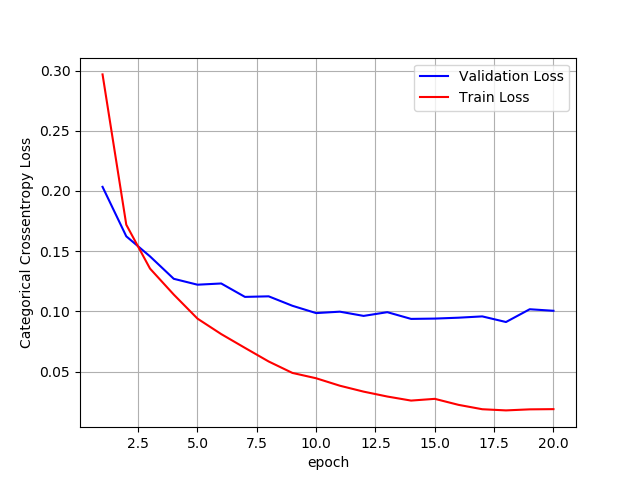

In [0]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


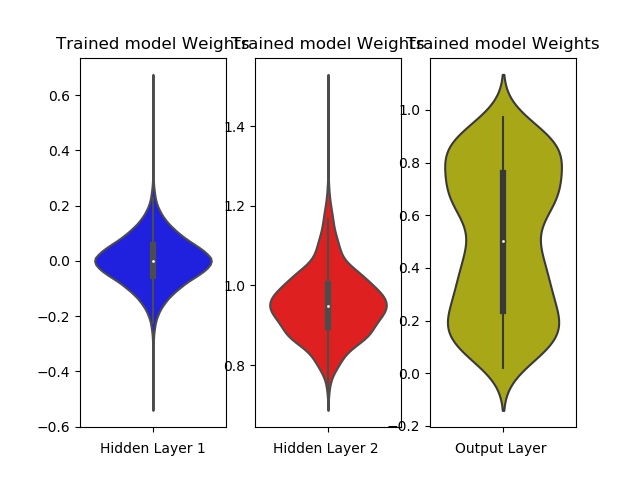

In [0]:
w_after = model_batch.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> 5. MLP + Dropout + AdamOptimizer </h2>

In [0]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_3 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_4 (Batch (None, 128)               512       
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 10)               

In [0]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 148us/step - loss: 0.6645 - accuracy: 0.7935 - val_loss: 0.2897 - val_accuracy: 0.9148
Epoch 2/20
60000/60000 [==============================] - 8s 135us/step - loss: 0.4312 - accuracy: 0.8698 - val_loss: 0.2544 - val_accuracy: 0.9243
Epoch 3/20
60000/60000 [==============================] - 8s 136us/step - loss: 0.3837 - accuracy: 0.8824 - val_loss: 0.2325 - val_accuracy: 0.9310
Epoch 4/20
60000/60000 [==============================] - 8s 134us/step - loss: 0.3580 - accuracy: 0.8908 - val_loss: 0.2217 - val_accuracy: 0.9360
Epoch 5/20
60000/60000 [==============================] - 8s 141us/step - loss: 0.3360 - accuracy: 0.8981 - val_loss: 0.2131 - val_accuracy: 0.9375
Epoch 6/20
60000/60000 [==============================] - 8s 132us/step - loss: 0.3213 - accuracy: 0.9036 - val_loss: 0.2117 - val_accuracy: 0.9411
Epoch 7/20
60000/60000 [==============================] - 8s 1

Test score: 0.1107972628198564
Test accuracy: 0.9675999879837036


<IPython.core.display.Javascript object>


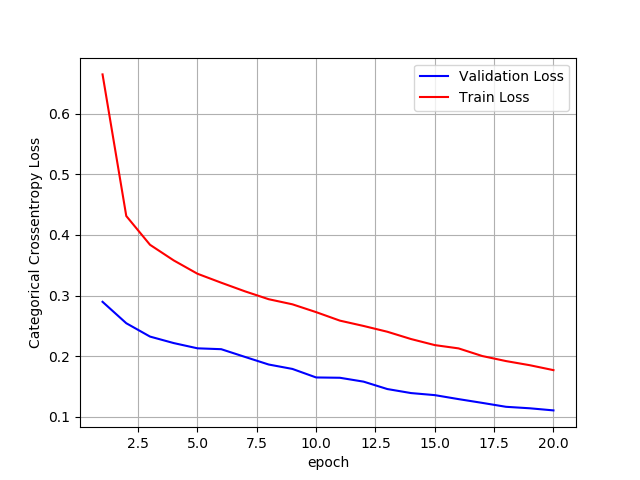

In [0]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


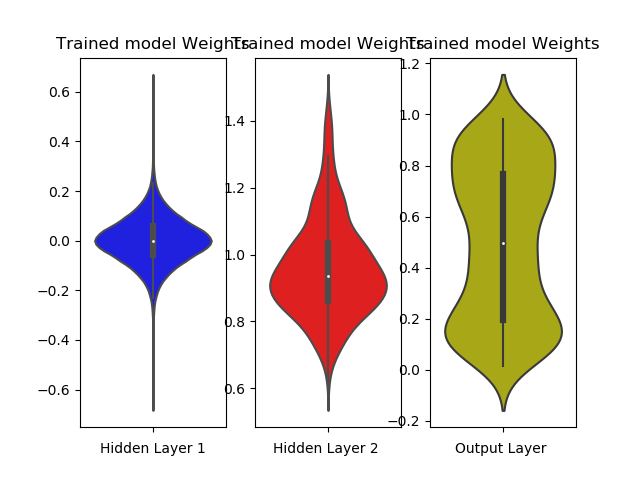

In [0]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> Hyper-parameter tuning of Keras models using Sklearn </h2>

In [0]:
from keras.optimizers import Adam,RMSprop,SGD
def best_hyperparameters(activ):

    model = Sequential()
    model.add(Dense(512, activation=activ, input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
    model.add(Dense(128, activation=activ, kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
    model.add(Dense(output_dim, activation='softmax'))


    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
    
    return model

In [0]:
# https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

activ = ['sigmoid','relu']

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

model = KerasClassifier(build_fn=best_hyperparameters, epochs=nb_epoch, batch_size=batch_size, verbose=0)
param_grid = dict(activ=activ)

# if you are using CPU
# grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
# if you are using GPU dont use the n_jobs parameter

grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_train, Y_train)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [0]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.978850 using {'activ': 'relu'}
0.973017 (0.003706) with: {'activ': 'sigmoid'}
0.978850 (0.002410) with: {'activ': 'relu'}


# Assignment Begins Here .....

# *Part* 1 : 2 Hidden layer 784-364-164-10 with **Relu Activation** , **Adam Optimizer** ,**Drop out rate of 0.55** and **BatchNormalization**

In [0]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_layer2 = Sequential()

model_layer2.add(Dense(364, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_layer2.add(BatchNormalization())
model_layer2.add(Dropout(0.55))

model_layer2.add(Dense(164, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_layer2.add(BatchNormalization())
model_layer2.add(Dropout(0.55))

model_layer2.add(Dense(output_dim, activation='softmax'))


model_layer2.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_66 (Dense)             (None, 364)               285740    
_________________________________________________________________
batch_normalization_24 (Batc (None, 364)               1456      
_________________________________________________________________
dropout_22 (Dropout)         (None, 364)               0         
_________________________________________________________________
dense_67 (Dense)             (None, 164)               59860     
_________________________________________________________________
batch_normalization_25 (Batc (None, 164)               656       
_________________________________________________________________
dropout_23 (Dropout)         (None, 164)               0         
_________________________________________________________________
dense_68 (Dense)             (None, 10)              

In [0]:
model_layer2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_layer2 = model_layer2.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

score_layer2 = model_layer2.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score_layer2[0]) 
print('Test accuracy:', score_layer2[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 12s 201us/step - loss: 0.5760 - accuracy: 0.8243 - val_loss: 0.1817 - val_accuracy: 0.9432
Epoch 2/20
60000/60000 [==============================] - 7s 124us/step - loss: 0.3053 - accuracy: 0.9098 - val_loss: 0.1473 - val_accuracy: 0.9547
Epoch 3/20
60000/60000 [==============================] - 9s 148us/step - loss: 0.2430 - accuracy: 0.9280 - val_loss: 0.1178 - val_accuracy: 0.9636
Epoch 4/20
60000/60000 [==============================] - 8s 132us/step - loss: 0.2117 - accuracy: 0.9364 - val_loss: 0.1050 - val_accuracy: 0.9681
Epoch 5/20
60000/60000 [==============================] - 9s 146us/step - loss: 0.1896 - accuracy: 0.9441 - val_loss: 0.0946 - val_accuracy: 0.9706
Epoch 6/20
60000/60000 [==============================] - 8s 135us/step - loss: 0.1708 - accuracy: 0.9486 - val_loss: 0.0898 - val_accuracy: 0.9722
Epoch 7/20
60000/60000 [==============================] - 9s 

<IPython.core.display.Javascript object>


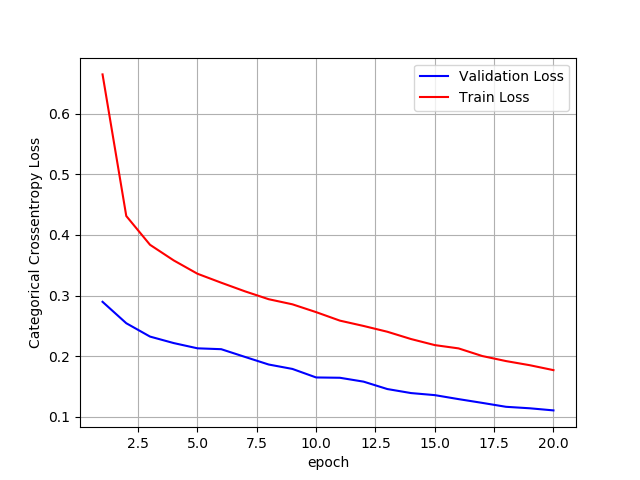

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy_layer2 = history.history['val_loss']
ty_layer2 = history.history['loss']
plt_dynamic(x, vy_layer2, ty_layer2, ax)

# Part 2 : 3 layers 784-364-164-128-10 with **Relu Activation** , **Adam Optimizer** ,**Drop out rate of 0.55** and **BatchNormalization**

In [0]:
model_layer3 = Sequential()

model_layer3.add(Dense(640, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_layer3.add(BatchNormalization())
model_layer3.add(Dropout(0.50))

model_layer3.add(Dense(320, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_layer3.add(BatchNormalization())
model_layer3.add(Dropout(0.50))

model_layer3.add(Dense(160, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_layer3.add(BatchNormalization())
model_layer3.add(Dropout(0.50))

model_layer3.add(Dense(output_dim, activation='softmax'))


model_layer3.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_73 (Dense)             (None, 640)               502400    
_________________________________________________________________
batch_normalization_29 (Batc (None, 640)               2560      
_________________________________________________________________
dropout_27 (Dropout)         (None, 640)               0         
_________________________________________________________________
dense_74 (Dense)             (None, 320)               205120    
_________________________________________________________________
batch_normalization_30 (Batc (None, 320)               1280      
_________________________________________________________________
dropout_28 (Dropout)         (None, 320)               0         
_________________________________________________________________
dense_75 (Dense)             (None, 160)             

In [0]:
model_layer3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_layer3 = model_layer3.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

score_layer3 = model_layer3.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score_layer3[0]) 
print('Test accuracy:', score_layer3[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 18s 302us/step - loss: 0.5433 - accuracy: 0.8332 - val_loss: 0.1660 - val_accuracy: 0.9463
Epoch 2/20
60000/60000 [==============================] - 16s 263us/step - loss: 0.2550 - accuracy: 0.9245 - val_loss: 0.1318 - val_accuracy: 0.9564
Epoch 3/20
60000/60000 [==============================] - 16s 274us/step - loss: 0.2042 - accuracy: 0.9389 - val_loss: 0.1060 - val_accuracy: 0.9659
Epoch 4/20
60000/60000 [==============================] - 16s 270us/step - loss: 0.1800 - accuracy: 0.9465 - val_loss: 0.0973 - val_accuracy: 0.9699
Epoch 5/20
60000/60000 [==============================] - 16s 271us/step - loss: 0.1548 - accuracy: 0.9534 - val_loss: 0.0914 - val_accuracy: 0.9719
Epoch 6/20
60000/60000 [==============================] - 16s 273us/step - loss: 0.1418 - accuracy: 0.9573 - val_loss: 0.0820 - val_accuracy: 0.9751
Epoch 7/20
60000/60000 [==============================] 

<IPython.core.display.Javascript object>


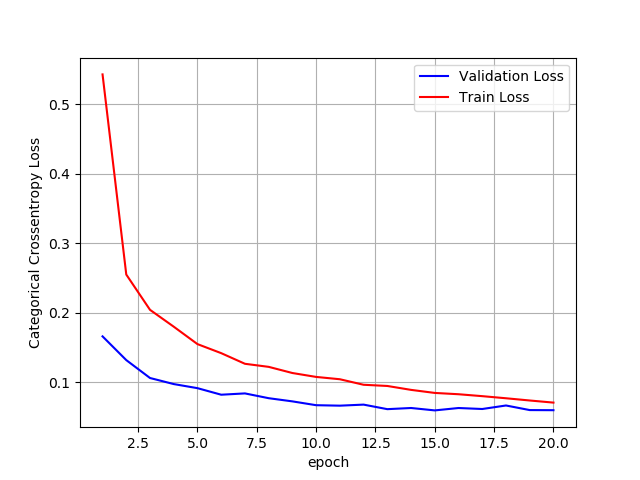

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy_layer3 = history_layer3.history['val_loss']
ty_layer3 = history_layer3.history['loss']
plt_dynamic(x, vy_layer3, ty_layer3, ax)

# Part 3 : 5 layers 784-256-184-128-92-64-10 with **Relu Activation** , **Adam Optimizer** ,**Drop out rate of 0.55** and **BatchNormalization**

In [0]:
model_layer5 = Sequential()

model_layer5.add(Dense(256, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_layer5.add(BatchNormalization())
model_layer5.add(Dropout(0.55))

model_layer5.add(Dense(184, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_layer5.add(BatchNormalization())
model_layer5.add(Dropout(0.55))

model_layer5.add(Dense(128, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_layer5.add(BatchNormalization())
model_layer5.add(Dropout(0.55))

model_layer5.add(Dense(92, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_layer5.add(BatchNormalization())
model_layer5.add(Dropout(0.55))

model_layer5.add(Dense(64, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_layer5.add(BatchNormalization())
model_layer5.add(Dropout(0.55))

model_layer5.add(Dense(output_dim, activation='softmax'))


model_layer5.summary()



Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_77 (Dense)             (None, 256)               200960    
_________________________________________________________________
batch_normalization_32 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_30 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_78 (Dense)             (None, 184)               47288     
_________________________________________________________________
batch_normalization_33 (Batc (None, 184)               736       
_________________________________________________________________
dropout_31 (Dropout)         (None, 184)               0         
_________________________________________________________________
dense_79 (Dense)             (None, 128)             

In [0]:
model_layer5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_layer5 = model_layer5.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

score_layer5 = model_layer5.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score_layer5[0]) 
print('Test accuracy:', score_layer5[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 14s 237us/step - loss: 1.5439 - accuracy: 0.4915 - val_loss: 0.4437 - val_accuracy: 0.8800
Epoch 2/20
60000/60000 [==============================] - 9s 142us/step - loss: 0.6606 - accuracy: 0.8003 - val_loss: 0.2529 - val_accuracy: 0.9298
Epoch 3/20
60000/60000 [==============================] - 9s 151us/step - loss: 0.4845 - accuracy: 0.8671 - val_loss: 0.2126 - val_accuracy: 0.9408
Epoch 4/20
60000/60000 [==============================] - 10s 167us/step - loss: 0.4101 - accuracy: 0.8910 - val_loss: 0.1873 - val_accuracy: 0.9497
Epoch 5/20
60000/60000 [==============================] - 9s 147us/step - loss: 0.3649 - accuracy: 0.9059 - val_loss: 0.1852 - val_accuracy: 0.9499
Epoch 6/20
60000/60000 [==============================] - 10s 169us/step - loss: 0.3352 - accuracy: 0.9150 - val_loss: 0.1645 - val_accuracy: 0.9557
Epoch 7/20
60000/60000 [==============================] - 9

<IPython.core.display.Javascript object>


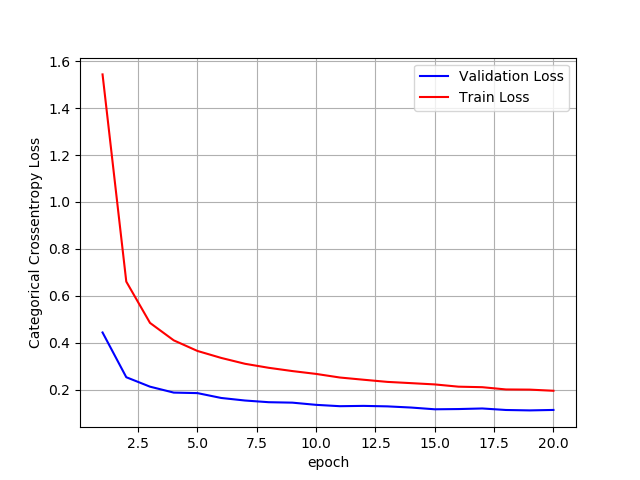

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy_layer5 = history_layer5.history['val_loss']
ty_layer5 = history_layer5.history['loss']
plt_dynamic(x, vy_layer5, ty_layer5, ax)

# Conclusions

In [0]:
from prettytable import PrettyTable

x = PrettyTable(border=True)

x.field_names = ['Model','DropOut Rate','Train Loss','Validation Loss','Test Loss']

x.add_row(['2 layer LSTM',0.55,ty_layer2[-1],vy_layer2[-1],score_layer2[0]])
x.add_row(['3 layer LSTM',0.50,ty_layer3[-1],vy_layer3[-1],score_layer3[0]])
x.add_row(['5 layer LSTM',0.55,ty_layer5[-1],vy_layer5[-1],score_layer5[0]])


print(x)

+--------------+--------------+---------------------+---------------------+---------------------+
|    Model     | DropOut Rate |      Train Loss     |   Validation Loss   |      Test Loss      |
+--------------+--------------+---------------------+---------------------+---------------------+
| 2 layer LSTM |     0.55     | 0.17715959407488505 | 0.11079726482629776 | 0.06540442340931041 |
| 3 layer LSTM |     0.5      |  0.0706006271938483 | 0.05966865533767268 | 0.05966865510678035 |
| 5 layer LSTM |     0.55     |  0.1951625617345174 |  0.113418318990618  | 0.11341831753402948 |
+--------------+--------------+---------------------+---------------------+---------------------+
